# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": 150.7967,
        "lat": -2.5744
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 84.94,
        "feels_like": 89.13,
        "temp_min": 84.94,
        "temp_max": 84.94,
        "pressure": 1007,
        "humidity": 60,
        "sea_level": 1007,
        "grnd_level": 1005
    },
    "visibility": 10000,
    "wind": {
        "speed": 5.37,
        "deg": 96,
        "gust": 6.89
    },
    "clouds": {
        "all": 40
    },
    "dt": 1665456158,
    "sys": {
        "country": "PG",
        "sunrise": 1665430738,
        "sunset": 1665474488
    },
    "timezone": 36000,
    "id": 2094342,
    "name": "Kavieng",
    "cod": 200
}


In [4]:
#Empty list
city_name=[]  
cloud=[]        
country=[]      
date=[]         
humidity=[]     
latitude=[]    
longitude=[]   
maxtemp=[]      
wind_speed=[]         

#Empty list with data
for city in cities:
        
        response=requests.get(query_url + city).json()
        
        try:                                                
            city_name.append(response['name'])
            cloud.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])             
            latitude.append(response['coord']['lat'])
            longitude.append(response['coord']['lon'])             
            maxtemp.append(response['main']['temp'])
            wind_speed.append(response['wind']['speed']) 
            
            print(f"{city} found.") 
        
        except KeyError:
            print(f"Error {city} not found.") 
            
        continue
                                                                

vaini found.
ribeira grande found.
Error illoqqortoormiut not found.
mataura found.
port alfred found.
san cristobal found.
marquard found.
dawson creek found.
saint-pierre found.
ushuaia found.
pevek found.
punta arenas found.
cape town found.
chokurdakh found.
kannur found.
faanui found.
antalaha found.
dingle found.
vila franca do campo found.
rikitea found.
nanortalik found.
hermanus found.
torbay found.
esso found.
klyuchi found.
qaanaaq found.
Error amderma not found.
puerto ayora found.
kjollefjord found.
albany found.
Error nizhneyansk not found.
roald found.
chuy found.
Error karamay not found.
mahebourg found.
iquique found.
saldanha found.
ancud found.
nikolskoye found.
maceio found.
ponta do sol found.
victoria found.
ixtapa found.
mount isa found.
balkhash found.
sola found.
busselton found.
vao found.
lalin found.
harper found.
bathsheba found.
leh found.
garden city found.
rockland found.
khatanga found.
kodiak found.
nishihara found.
hilo found.
hokitika found.
doba fou

puerto el triunfo found.
vostok found.
safaga found.
egvekinot found.
bethel found.
paramonga found.
consett found.
rocha found.
kawalu found.
ardakan found.
guadalupe y calvo found.
panorama found.
valley found.
tateyama found.
Error one hundred mile house not found.
Error urdzhar not found.
Error paradwip not found.
gandajika found.
lazaro cardenas found.
mehamn found.
homer found.
Error cheuskiny not found.
outjo found.
alofi found.
Error mentok not found.
samagaltay found.
Error kazbegi not found.
manakara found.
lyuban found.
moussoro found.
esil found.
labuhan found.
yulara found.
yook found.
barcelos found.
discovery bay found.
xapuri found.
tual found.
haines junction found.
mirabad found.
quatre cocos found.
shubarshi found.
gat found.
aberdeen found.
amnat charoen found.
jaca found.
sabla found.
presidencia roque saenz pena found.
baykit found.
hoima found.
pimentel found.
nouadhibou found.
Error kamenskoye not found.
aniva found.
tiznit found.
maun found.
Error rawannawi not

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": maxtemp,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed": wind_speed
}

weather_df = pd.DataFrame(weather)
weather_df["Max Temperature"].head


<bound method NDFrame.head of 0      78.96
1      68.77
2      52.03
3      73.18
4      71.78
       ...  
549    60.82
550    90.27
551    68.68
552    76.73
553    76.71
Name: Max Temperature, Length: 554, dtype: float64>

In [6]:
weather_df.to_csv("/Users/kevinmoreno/Documents/Northwestern/classrepo/NU-VIRT-DATA-PT-08-2022-U-LOLC/02-Homework/06-Python-APIs/Instructions/starter_code/weather_df.csv")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_df["Humidity"].max()

100

In [8]:
#  Get the indices of cities that have humidity over 100%.
(weather_df[weather_df['Humidity'] > 100])

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

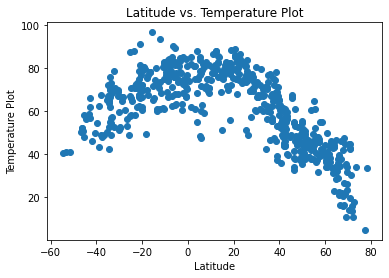

In [10]:
plt.scatter(weather_df["Latitude"],weather_df["Max Temperature"])
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature Plot")
plt.show()

#As latitude moves further away from 0 temperature drops. Thus the further north or south someone travel the more likely the temperatures will drop. 

## Latitude vs. Humidity Plot

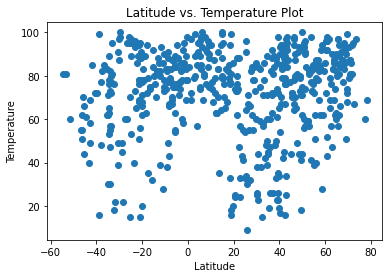

In [11]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity"])
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

#Temperature around the equator tends to hover around 75 to 100 degrees. While Temprature north and south of the equator flactuates more. 


## Latitude vs. Cloudiness Plot

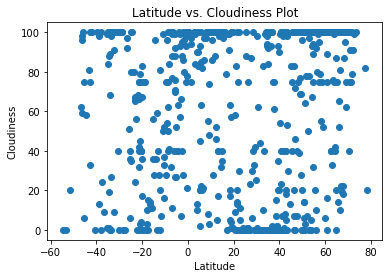

In [12]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"])
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

#The data on cloudiness seems entirely random. May not have a correlation with latitude 

## Latitude vs. Wind Speed Plot

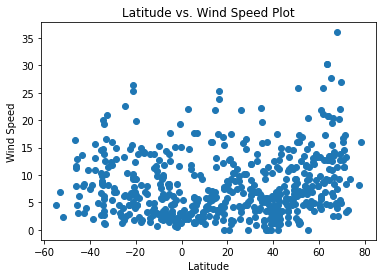

In [13]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"])
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

#wind speed seems to stay mostly below 15 mph but there is not enough evidence to corrolate it with latitude. 

## Linear Regression

In [14]:
#Split data between Northern and southern Hemisphere
Northern_Hemisphere = (weather_df[weather_df["Latitude"] > 0])
Northern_Hemisphere.head()

Southern_Hemisphere = (weather_df[weather_df["Latitude"] < 0])
Southern_Hemisphere.head()



,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,1665455905,-21.2000,-175.2000,78.96,69,40,25.32
2,Mataura,NZ,1665456159,-46.1927,168.8643,52.03,51,98,8.08
3,Port Alfred,ZA,1665456160,-33.5906,26.8910,73.18,72,98,1.01
5,Marquard,ZA,1665456160,-28.6645,27.4305,64.96,49,100,13.00
7,Saint-Pierre,RE,1665456161,-21.3393,55.4781,67.68,68,75,4.61


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

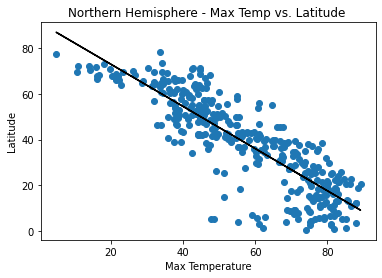

In [15]:
(slope, intercept, rvalue, pvalue, std)= linregress(Northern_Hemisphere["Max Temperature"], Northern_Hemisphere["Latitude"])

regression_line = (slope * Northern_Hemisphere["Max Temperature"] + intercept)

plt.scatter(Northern_Hemisphere["Max Temperature"],Northern_Hemisphere["Latitude"])
plt.plot(Northern_Hemisphere["Max Temperature"],regression_line,color="black")
plt.title("Northern Hemisphere - Max Temp vs. Latitude ")
plt.xlabel("Max Temperature")
plt.ylabel("Latitude")
plt.show()

#it apears that there is a relationship between max temp and latitude. As latitde decreases to the equator temprature increase. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

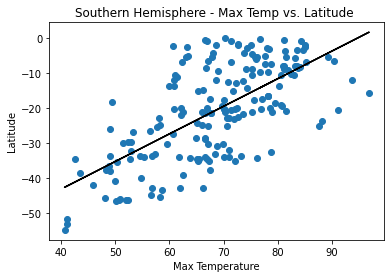

In [16]:
(slope, intercept, rvalue, pvalue, std)= linregress(Southern_Hemisphere["Max Temperature"], Southern_Hemisphere["Latitude"])

regression_line = (slope * Southern_Hemisphere["Max Temperature"] + intercept)

plt.scatter(Southern_Hemisphere["Max Temperature"],Southern_Hemisphere["Latitude"])
plt.plot(Southern_Hemisphere["Max Temperature"],regression_line,color="black")
plt.title("Southern Hemisphere - Max Temp vs. Latitude ")
plt.xlabel("Max Temperature")
plt.ylabel("Latitude")
plt.show()
#it apears that there is a relationship between max temp and latitude. As latitde increases to the equator temprature increase. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

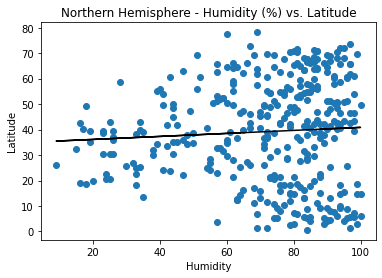

In [17]:
(slope, intercept, rvalue, pvalue, std)= linregress(Northern_Hemisphere["Humidity"], Northern_Hemisphere["Latitude"])

regression_line = (slope * Northern_Hemisphere["Humidity"] + intercept)

plt.scatter(Northern_Hemisphere["Humidity"],Northern_Hemisphere["Latitude"])
plt.plot(Northern_Hemisphere["Humidity"],regression_line,color="black")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.show()

#in the Norther Hemisphere there is little corrolation between humidity and latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

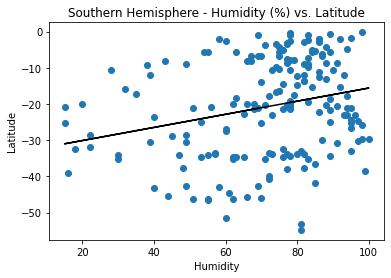

In [18]:
(slope, intercept, rvalue, pvalue, std)= linregress(Southern_Hemisphere["Humidity"], Southern_Hemisphere["Latitude"])

regression_line = (slope * Southern_Hemisphere["Humidity"] + intercept)

plt.scatter(Southern_Hemisphere["Humidity"],Southern_Hemisphere["Latitude"])
plt.plot(Southern_Hemisphere["Humidity"],regression_line,color="black")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.show()

#in the Southern Hemisphere there is little corrolation between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

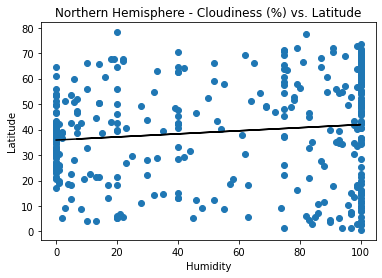

In [19]:
(slope, intercept, rvalue, pvalue, stderr)= linregress(Northern_Hemisphere["Cloudiness"], Northern_Hemisphere["Latitude"])

regression_line = (slope * Northern_Hemisphere["Cloudiness"] + intercept)

plt.scatter(Northern_Hemisphere["Cloudiness"],Northern_Hemisphere["Latitude"])
plt.plot(Northern_Hemisphere["Cloudiness"],regression_line,color="black")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.show()

#in the Norther Hemisphere there is little corrolation between cloudiness and latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

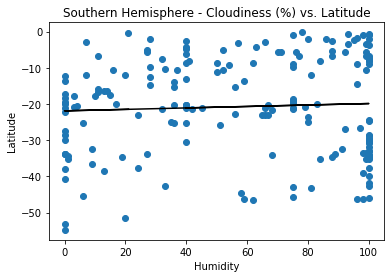

In [20]:
(slope, intercept, rvalue, pvalue, stderr)= linregress(Southern_Hemisphere["Cloudiness"], Southern_Hemisphere["Latitude"])

regression_line = (slope * Southern_Hemisphere["Cloudiness"] + intercept)

plt.scatter(Southern_Hemisphere["Cloudiness"],Southern_Hemisphere["Latitude"])
plt.plot(Southern_Hemisphere["Cloudiness"],regression_line,color="black")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.show()

#in the Southern Hemisphere there is little corrolation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

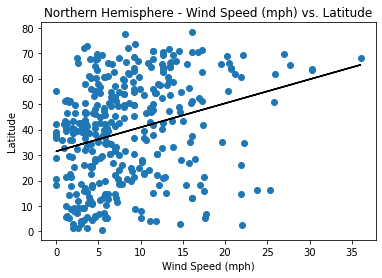

In [21]:
(slope, intercept, rvalue, pvalue, stderr)= linregress(Northern_Hemisphere["Wind Speed"], Northern_Hemisphere["Latitude"])

regression_line = (slope * Northern_Hemisphere["Wind Speed"] + intercept)

plt.scatter(Northern_Hemisphere["Wind Speed"],Northern_Hemisphere["Latitude"])
plt.plot(Northern_Hemisphere["Wind Speed"],regression_line,color="black")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.show()

#in the Norther Hemisphere there is corrolation between windspeed and latitude. Though these may be caused by outliers. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

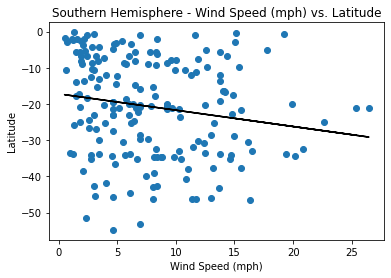

In [22]:
(slope, intercept, rvalue, pvalue, stderr)= linregress(Southern_Hemisphere["Wind Speed"], Southern_Hemisphere["Latitude"])

regression_line = (slope * Southern_Hemisphere["Wind Speed"] + intercept)

plt.scatter(Southern_Hemisphere["Wind Speed"],Southern_Hemisphere["Latitude"])
plt.plot(Southern_Hemisphere["Wind Speed"],regression_line,color="black")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.show()

#In the Souther Hemisphere there is corrolation between windspeed and latitude. Though these may be caused by outliers. 